## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [1]:
# Preliminaries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Activation
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

Let's explore the dataset a little bit

In [3]:
# Load the data, shuffled and split between train and test sets (x_train and y_rain)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train[0].shape

(28, 28)

In [5]:
#Let's just look at a particular example to see what is inside

x_train[444]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 116, 137, 251, 178,  15,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
# What is the corresponding label in the training set?
y_train[444]

np.uint8(2)

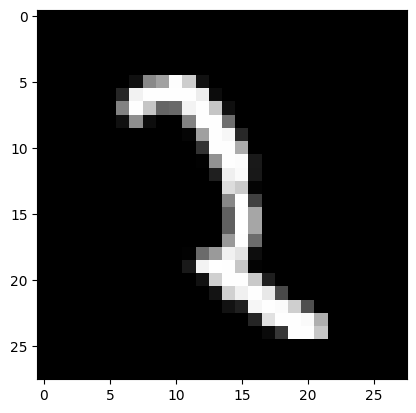

In [7]:
# Let's see what this image actually looks like

plt.imshow(x_train[444], cmap='Greys_r')

In [8]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [9]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [10]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [12]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
# model_1.add(Activation(''))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [13]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [15]:
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7372 - loss: 0.8519 - val_accuracy: 0.9338 - val_loss: 0.2137
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9186 - loss: 0.2764 - val_accuracy: 0.9527 - val_loss: 0.1542
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9383 - loss: 0.2059 - val_accuracy: 0.9616 - val_loss: 0.1255
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9491 - loss: 0.1714 - val_accuracy: 0.9646 - val_loss: 0.1121
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9528 - loss: 0.1577 - val_accuracy: 0.9665 - val_loss: 0.1096
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9577 - loss: 0.1408 - val_accuracy: 0.9702 - val_loss: 0.1004
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9608 - loss: 0.1298 - val_accuracy: 0.9710 - val_loss: 0.1010
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9621 - loss: 0.1279 - val_accuracy: 0.

In [16]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09351259469985962
Test accuracy: 0.9767000079154968


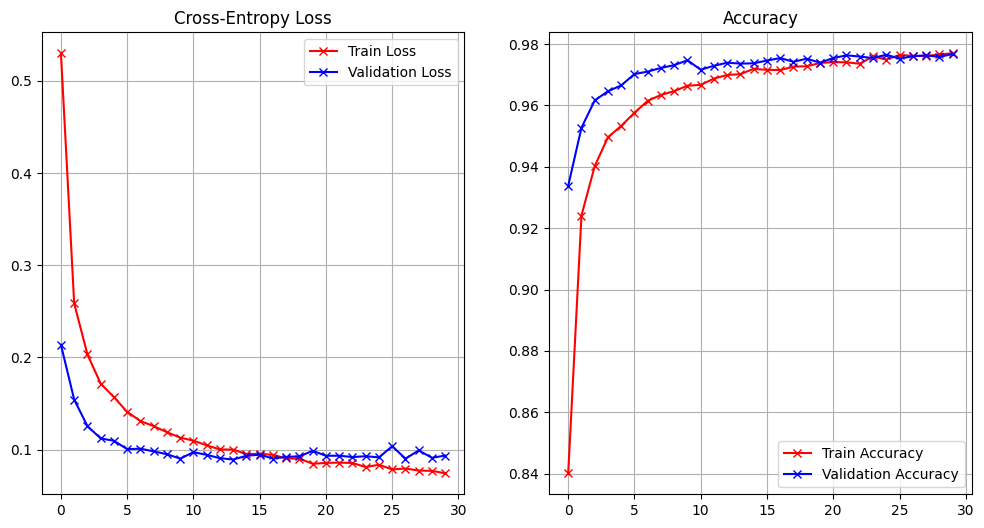

In [17]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    
    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross-Entropy Loss')
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)
    
    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"
    
    ax.plot(history.history[train_acc],'r-x', label="Train Accuracy")
    ax.plot(history.history[val_acc],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




## SOLUTION

In [18]:
# Model with two hidden layers (400 and 300 units)
model_2 = Sequential()

model_2.add(Dense(400, activation="relu", input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation="relu"))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation="softmax"))

# Compile the model
optimizer = RMSprop(learning_rate=0.001)
model_2.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])



In [19]:
# Train the model
history_2 = model_2.fit(x_train, y_train,
                        batch_size=128,
                        epochs=20,
                        verbose=1,
                        validation_data=(x_test, y_test),)

# Print model summary
model_2.summary()

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8199 - loss: 0.5786 - val_accuracy: 0.9615 - val_loss: 0.1289
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9522 - loss: 0.1617 - val_accuracy: 0.9681 - val_loss: 0.1032
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9643 - loss: 0.1204 - val_accuracy: 0.9758 - val_loss: 0.0864
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9692 - loss: 0.0997 - val_accuracy: 0.9767 - val_loss: 0.0794
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9738 - loss: 0.0864 - val_accuracy: 0.9784 - val_loss: 0.0749
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9767 - loss: 0.0791 - val_accuracy: 0.9790 - val_loss: 0.0698
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9781 - loss: 0.0722 - val_accuracy: 0.9798 - val_loss: 0.0716
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9807 - loss: 0.0635 - val_accuracy: 0.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 874,622 (3.34 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 437,312 (1.67 MB)

Model_1 had 55,050 trainable params while Model_2 has 437,312 trainable params and 437,312 optimized params

In [20]:
## We will use Keras evaluate function to evaluate performance on the test set
# Evaluate model_2 on the test set
test_loss, test_accuracy = model_2.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss: 0.07133042812347412
Test Accuracy: 0.9843000173568726


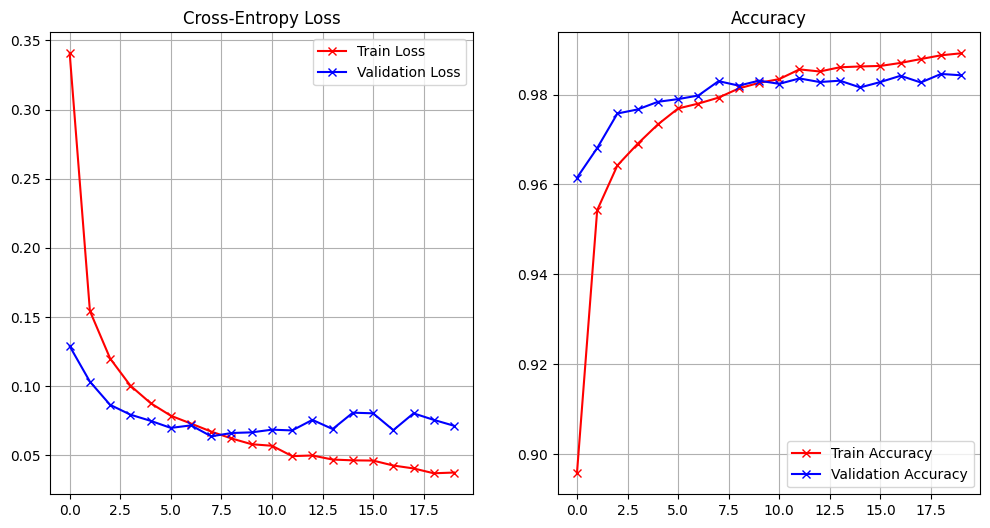

In [26]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    
    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross-Entropy Loss')
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)
    
    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"
    
    ax.plot(history.history[train_acc],'r-x', label="Train Accuracy")
    ax.plot(history.history[val_acc],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

plot_loss_accuracy(history_2)

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?

Answer 1)

Model 1 only has 64 -> 64 hidden layers while Model 2 has 400 -> 300 Hidden layer size.

Model 1 is lightweight with lesser ize of hidden layers while Model 2 will be slower to train.

Model 1 avoids overfitting due to having fewer parameters.

Model 2 avoids overfitting by using an aggressive dropout of 0.4 despite having a larger size.

To choose one we need to take a look at the accuracy of the two models

Accuracy of model_1 = 0.9761999845504761 and model 2 is 0.9843000173568726

Model 2 will be prefered as it provides a higher accuracy than Model 1

Model 2 seems like a better choice for deploying in production but I would choose Model 1 due it's smaller size the difference in the accuracy of Model_1 and Model_2 is quite small.

Using Model_1 gives the advantage of a smaller while retaining a high accuracy.

Answer 2)

Both models show decreasing training loss and increasing training accuracy, which is good. But the validation loss flattens and then slightly rises, while validation accuracy stays mostly flat. This means the models are learning the training data well, but not improving much on new, unseen data after a certain point. The loss is more meaningful here because it shows early signs of overfitting, while accuracy stays high and might hide that problem.

Answer 3)

To improve the model we can utilize Batch Normalization to stbilize learning and Adam Optimizer for faster convergence

While reducing the Dropout to 0.3 as well as using Early stopping to save time and computational resources from being easted on unneeded epochs.
Increase the epochs to 30 to see Early stopping in action if it happens

In [22]:
#Import necessary Functions
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model_3 = Sequential([
    Dense(400, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(300, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history_3 = model_3.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=30,
                        batch_size=128,
                        callbacks=[early_stop],
                        verbose=1)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8615 - loss: 0.4587 - val_accuracy: 0.9673 - val_loss: 0.1091
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9605 - loss: 0.1317 - val_accuracy: 0.9732 - val_loss: 0.0848
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9692 - loss: 0.0953 - val_accuracy: 0.9772 - val_loss: 0.0707
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9744 - loss: 0.0824 - val_accuracy: 0.9764 - val_loss: 0.0758
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9786 - loss: 0.0671 - val_accuracy: 0.9774 - val_loss: 0.0734
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9772 - loss: 0.0683 - val_accuracy: 0.9809 - val_loss: 0.0641
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9825 - loss: 0.0531 - val_accuracy: 0.9804 - val_loss: 0.0589
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9841 - loss: 0.0495 - val_accuracy: 0.

Check for Accuracy to evaluate the new model

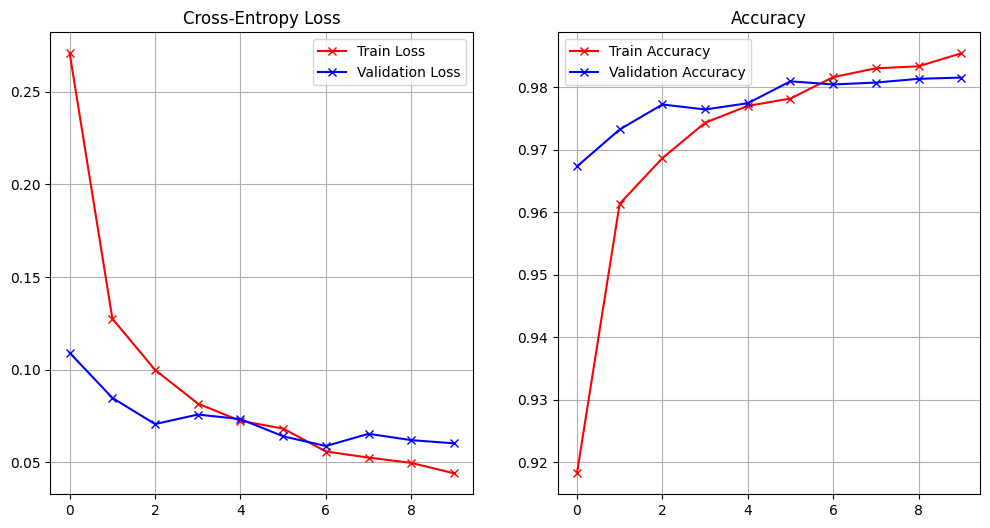

In [23]:
plot_loss_accuracy(history_3)

In [28]:
test_loss, test_accuracy = model_3.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.06031505763530731
Test Accuracy: 0.9815000295639038


Accuracy of model_2 is 0.9843000173568726 and model_3 is 0.9815000295639038. While there is not a huge difference in accuracy, the new model_3 only underwent training for 10 epochs before going through an early stopping, stopping early when there are signs of overfitting, the model performs significantly better.